# Mnist Dataset

The dataset contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# Loading Mnist dataset from the Internet

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print("Train features:",x_train.shape)
print("Train Labels:  ",y_train.shape)
print("Test Features: ",x_test.shape)
print("Test Labels:   ",y_test.shape)
print("Dimention: ",x_train.ndim)
print("Dimention: ",y_train.ndim)
print("Dimention: ",x_test.ndim)
print("Dimention: ",y_test.ndim)

Train features: (60000, 28, 28)
Train Labels:   (60000,)
Test Features:  (10000, 28, 28)
Test Labels:    (10000,)
Dimention:  3
Dimention:  1
Dimention:  3
Dimention:  1


# Visualizing Data

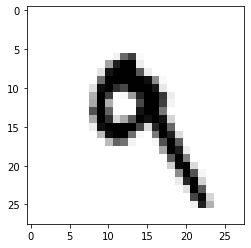

In [4]:
import matplotlib.pyplot as plt
digit  = x_test[7]
plt.imshow(digit,cmap = plt.cm.binary)
plt.show()

# Actual Label

In [5]:
y_test[7]

9

In [6]:
#x_train[1]

# Normalizing Data

Changing Dimension from 3 into 2

As you can see above there are multiple values between 0 to 255 and 255 is Max value so what we're doing is managing the values between 0 and 1 by dividing the train sets by 255.

In [7]:
new_x_train = x_train.reshape(60000, 28 * 28)
new_x_test = x_test.reshape(10000, 28 * 28)
new_x_train, new_x_test = new_x_train/255.0, new_x_test/255.0

In [8]:
#x_train[1]

# One hot encoding

In [9]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train) 
y_test = to_categorical(y_test)

In [10]:
print(new_x_train.ndim)
print(new_x_test.ndim)
print("Train features:",new_x_train.shape)
print("Train Labels:  ",y_train.shape)
print("Test Features: ",new_x_test.shape)
print("Test Labels:   ",y_test.shape)

2
2
Train features: (60000, 784)
Train Labels:   (60000, 10)
Test Features:  (10000, 784)
Test Labels:    (10000, 10)


# Model

In [11]:
models = tf.keras.Sequential
layers = tf.keras.layers

model = models([layers.Dense(512,activation="relu",input_shape=(28 * 28,)),
                layers.Dense(64,activation="relu"),
                layers.Dense(16,activation="relu"),
                layers.Dense(10, activation='softmax')])

model.compile(optimizer="adam", # adam # rmsprop
             loss="categorical_crossentropy",
             metrics=["accuracy"])

history = model.fit(new_x_train,y_train,epochs=5,validation_split=(0.2))

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 9s 187us/sample - loss: 0.2516 - accuracy: 0.9263 - val_loss: 0.1282 - val_accuracy: 0.9621
Epoch 2/5
48000/48000 [==============================] - 8s 161us/sample - loss: 0.0967 - accuracy: 0.9710 - val_loss: 0.0930 - val_accuracy: 0.9701
Epoch 3/5
48000/48000 [==============================] - 9s 178us/sample - loss: 0.0648 - accuracy: 0.9802 - val_loss: 0.0960 - val_accuracy: 0.9712
Epoch 4/5
48000/48000 [==============================] - 7s 153us/sample - loss: 0.0489 - accuracy: 0.9845 - val_loss: 0.0969 - val_accuracy: 0.9710
Epoch 5/5
48000/48000 [==============================] - 7s 149us/sample - loss: 0.0374 - accuracy: 0.9879 - val_loss: 0.0880 - val_accuracy: 0.9761


# Evaluation

In [12]:
evaluation = model.evaluate(new_x_test,y_test,verbose=2)
print()
print("Loss: ",evaluation[0]*100,"%")
print("Accuracy: ",evaluation[1]*100,"%")

10000/1 - 1s - loss: 0.0394 - accuracy: 0.9781

Loss:  7.851570602597785 %
Accuracy:  97.81000018119812 %


# Prediction

Predicted value:  9
Actual value:  9


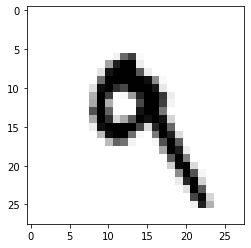

In [13]:
predict = 7
a = model.predict_classes(new_x_test)[predict]
print("Predicted value: ",a)
print("Actual value: ",np.argmax(y_test[predict]))
pic  = x_test[predict]
plt.imshow(pic,cmap = plt.cm.binary)
plt.show()

# Convnets for computer vision tasks

The following lines of code show what a basic convnet looks like. It’s a stack of
Conv2D and MaxPooling2D layers.
The number of channels is controlled by the first
argument passed to the Conv2D layers (32 or 64).

In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [15]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [16]:
# normalizing data
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))
new_x_train, new_x_test = x_train/255.0, x_test/255.0
#new_x_train, new_x_test = x_train.astype('float32') / 255, x_test.astype('float32') / 255

print("Train features:",new_x_train.shape)
print("Test Features: ",new_x_test.shape)

Train features: (60000, 28, 28, 1)
Test Features:  (10000, 28, 28, 1)


In [17]:
# one hot encol=ding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train) 
y_test = to_categorical(y_test)

print("Train Labels:  ",y_train.shape)
print("Test Labels:   ",y_test.shape)

Train Labels:   (60000, 10)
Test Labels:    (10000, 10)


In [18]:
models = tf.keras.Sequential
layers = tf.keras.layers

model1 = models([layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
                layers.MaxPooling2D((2, 2)),
                layers.Conv2D(64, (3, 3), activation='relu'),
                layers.MaxPooling2D((2, 2)),
                layers.Conv2D(64, (3, 3), activation='relu')])

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


The next step is to feed the last output tensor (of shape (3, 3, 64)) into a densely
connected classifier with a stack of Dense layers. These classifiers process vectors, which are 1D, whereas the current output is a 3D tensor. First we have to flatten the 3D outputs to 1D, and then add a few Dense layers.

In [19]:
models = tf.keras.Sequential
layers = tf.keras.layers

model2 = models([layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
                layers.MaxPooling2D((2, 2)),
                layers.Conv2D(64, (3, 3), activation='relu'),
                layers.MaxPooling2D((2, 2)),
                layers.Conv2D(64, (3, 3), activation='relu'),
                layers.Flatten(),
                layers.Dense(64, activation='relu'),
                layers.Dense(10, activation='softmax')])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [20]:
model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
history = model2.fit(new_x_train, y_train, epochs=5, batch_size=64)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 57s 947us/sample - loss: 0.1752 - accuracy: 0.9453
Epoch 2/5
60000/60000 [==============================] - 56s 926us/sample - loss: 0.0469 - accuracy: 0.9852
Epoch 3/5
60000/60000 [==============================] - 54s 904us/sample - loss: 0.0322 - accuracy: 0.9900
Epoch 4/5
60000/60000 [==============================] - 54s 897us/sample - loss: 0.0235 - accuracy: 0.9927
Epoch 5/5
60000/60000 [==============================] - 54s 902us/sample - loss: 0.0197 - accuracy: 0.9938


In [22]:
# model of chapter 5
evaluation1 = model2.evaluate(new_x_test,y_test,verbose=2)
print()
print("Loss: ",evaluation1[0]*100,"%")
print("Accuracy: ",evaluation1[1]*100,"%")

10000/1 - 5s - loss: 0.0153 - accuracy: 0.9910

Loss:  3.0068729236282525 %
Accuracy:  99.09999966621399 %


Whereas the densely connected network from chapter 2 had a test accuracy of 97.8%,
the basic convnet has a test accuracy of 99.0% and we decreased the error rate.

In [23]:
# First model of chapter 2
print("Loss: ",evaluation[0]*100,"%")
print("Accuracy: ",evaluation[1]*100,"%")

Loss:  7.851570602597785 %
Accuracy:  97.81000018119812 %
